/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64
R² en el conjunto de prueba: 0.9613061369214368
MSE en el conjunto de prueba: 2290.8836839519277


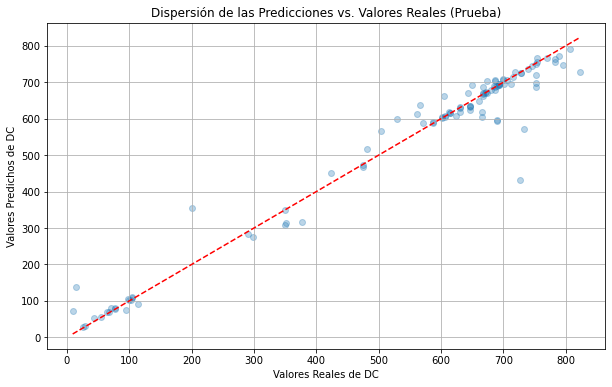

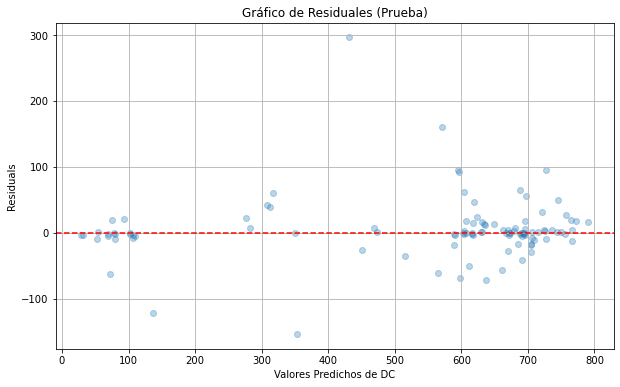

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

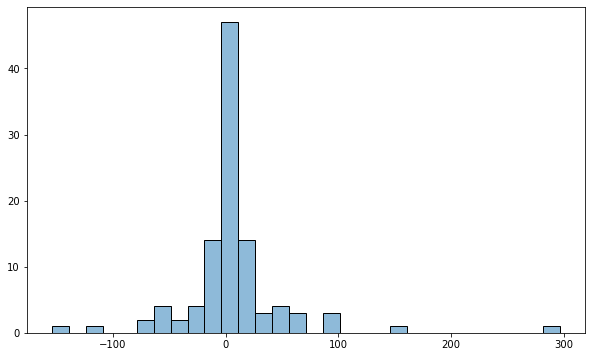

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Cargar el dataset
file_path = './forestfires.csv'
df = pd.read_csv(file_path)

# Revisar si hay valores nulos o inconsistentes en las características
print(df.isnull().sum())

# Seleccionar características y la etiqueta (DC)
X = df.drop(columns=['DC', 'area'])
y = df['DC']

# Identificar características numéricas y categóricas
numeric_features = ['X', 'Y', 'FFMC', 'DMC', 'ISI', 'temp', 'RH', 'wind', 'rain']
categorical_features = ['month', 'day']

# Preprocesamiento: Estandarizar características numéricas y codificar categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Configuración del modelo (Random Forest)
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Dividir los datos en entrenamiento y prueba para evaluar el rendimiento del modelo fuera de muestra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo en el conjunto de entrenamiento
model_pipeline.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model_pipeline.predict(X_test)

# Calcular R² en el conjunto de prueba
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R² en el conjunto de prueba: {r2}")
print(f"MSE en el conjunto de prueba: {mse}")

# Gráfico de dispersión de las predicciones vs. valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Dispersión de las Predicciones vs. Valores Reales (Prueba)')
plt.xlabel('Valores Reales de DC')
plt.ylabel('Valores Predichos de DC')
plt.grid(True)
plt.show()

# Gráfico Residual
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.3)
plt.axhline(0, color='red', linestyle='--')
plt.title('Gráfico de Residuales (Prueba)')
plt.xlabel('Valores Predichos de DC')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# Histograma de los errores residuales
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title('Distribución de los Errores Residuales (Prueba)')
plt.xlabel('Residuals')
plt.grid(True)
plt.show()

# Guardar el modelo entrenado
joblib.dump(model_pipeline, 'dc_prediction_random_forest_model.pkl')

# Cargar el modelo y hacer una predicción con nuevos datos
model_loaded = joblib.load('dc_prediction_random_forest_model.pkl')

# Ejemplo de nuevos datos
new_data = pd.DataFrame({
    'X': [7],
    'Y': [5],
    'FFMC': [86.2],
    'DMC': [26.2],
    'ISI': [5.1],
    'temp': [22.0],
    'RH': [45],
    'wind': [3.1],
    'rain': [0.0],
    'month': ['mar'],
    'day': ['fri']
})

# Convertir los nuevos datos a numpy array antes de predecir
new_data_array = new_data.values

# Realizar la predicción
prediction = model_loaded.predict(new_data_array)
print(f"Predicción del DC: {prediction[0]}")
